In [1]:
#指导教师：宋陆军教师
#参考资料：基于python的金融分析与风险管理-斯文
#          风险管理与金融机构赫尔

In [2]:
import numpy as  np #导入numpy模块
import pandas as pd #导入pandas模块
import scipy #导入scipy 统计模块
import matplotlib.pyplot as plt #导入pyplot模块
from pylab import mpl #导入mpl模块
# mpl.rcParams["font.sans-serif"] = ["simehei"]
# mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [3]:
import scipy.stats as st #导入统计子模块stats

In [4]:
a = 0.95  
z = st.norm.ppf(q=1-a) 
x = np.linspace(-4,4,300)
y = st.norm.pdf(x)
x1 = np.linspace(-4,z,300)
y1 = st.norm.pdf(x1)

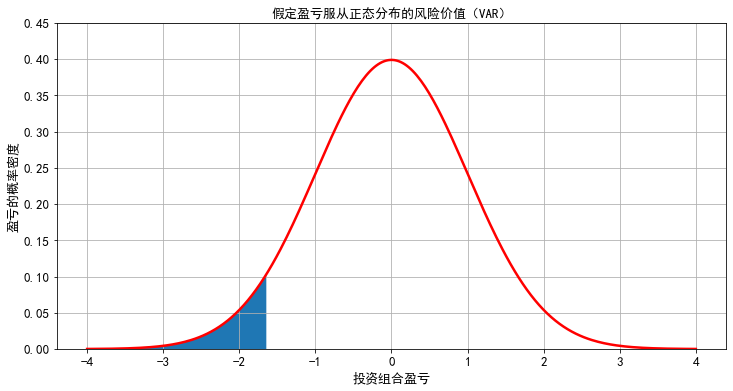

In [5]:
plt.figure(figsize=(12,6))
plt.plot(x,y,"r-",lw=2.5)
plt.fill_between(x1,y1)
plt.xlabel(u'投资组合盈亏',fontsize =13)
plt.ylabel(u'盈亏的概率密度',fontsize =13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,0.45)
plt.title(u'假定盈亏服从正态分布的风险价值（VAR）',fontsize =13)
plt.grid("True")


In [6]:
z

-1.6448536269514722

In [7]:
a = 0.97
z = st.norm.ppf(q=1-a)

In [8]:
z

-1.8807936081512509

In [9]:
def VaR_VCM(Vaule,Vp,X,N):
    import numpy as  np
    import scipy.stats as st
    z = np.abs(st.norm.ppf(q=1-X))
    return Vaule*Vp*np.sqrt(N)*z

In [10]:
data = pd.read_excel("D:\\BaiduNetdiskWorkspace\\source\\xs数据\\投资组合配置的资产情况.xlsx",sheet_name = "Sheet1", header=0,index_col=0)

In [11]:
data.head()

,贵州茅台,交通银行,嘉实增强信用基金,华夏恒生ETF,博时标普500ETF
日期,,,,,
2015-01-05,202.52,7.05,1.071,1.0955,1.1205
2015-01-06,197.83,6.90,1.073,1.0860,1.1105
2015-01-07,192.94,6.76,1.074,1.0964,1.1239
2015-01-08,191.76,6.53,1.074,1.1042,1.1446
2015-01-09,190.31,6.50,1.075,1.1075,1.1346


<AxesSubplot:xlabel='日期'>

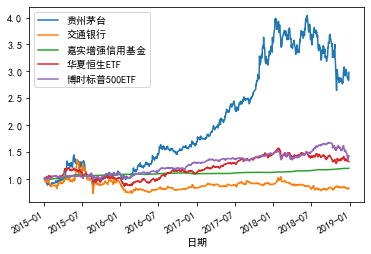

In [12]:
(data/data.iloc[1]).plot()

In [13]:
R = np.log(data/data.shift(1))

In [14]:
R = R.dropna()

In [15]:
R.describe()

,贵州茅台,交通银行,嘉实增强信用基金,华夏恒生ETF,博时标普500ETF
count,974.000000,974.000000,974.000000,974.000000,974.000000
mean,0.001098,-0.000202,0.000189,0.000278,0.000358
std,0.020740,0.018553,0.001182,0.011534,0.008880
min,-0.105361,-0.105999,-0.009594,-0.060571,-0.040847
25%,-0.009751,-0.006700,0.000000,-0.005675,-0.003079
50%,0.000203,0.000000,0.000000,0.000524,0.000072
75%,0.011425,0.006228,0.000836,0.006859,0.004508
max,0.095310,0.095557,0.007850,0.069038,0.045851


In [16]:
R_mean = R.mean()

In [17]:
print(R_mean)

贵州茅台          0.001098
交通银行         -0.000202
嘉实增强信用基金      0.000189
华夏恒生ETF       0.000278
博时标普500ETF    0.000358
dtype: float64


In [18]:
R_vol = R.std()

In [19]:
R_vol

贵州茅台          0.020740
交通银行          0.018553
嘉实增强信用基金      0.001182
华夏恒生ETF       0.011534
博时标普500ETF    0.008880
dtype: float64

In [20]:
R_cov = R.cov()

In [21]:
R_cov

,贵州茅台,交通银行,嘉实增强信用基金,华夏恒生ETF,博时标普500ETF
贵州茅台,0.000430,0.000147,5.783589e-06,0.000103,3.229233e-05
交通银行,0.000147,0.000344,8.539467e-06,0.000071,1.661787e-05
嘉实增强信用基金,0.000006,0.000009,1.397331e-06,0.000002,4.372576e-07
华夏恒生ETF,0.000103,0.000071,2.014885e-06,0.000133,2.694257e-05
博时标普500ETF,0.000032,0.000017,4.372576e-07,0.000027,7.884797e-05


In [22]:
R_corr=R.corr()

In [23]:
R_corr

,贵州茅台,交通银行,嘉实增强信用基金,华夏恒生ETF,博时标普500ETF
贵州茅台,1.000000,0.381695,0.235909,0.430277,0.175348
交通银行,0.381695,1.000000,0.389375,0.330182,0.100871
嘉实增强信用基金,0.235909,0.389375,1.000000,0.147779,0.041657
华夏恒生ETF,0.430277,0.330182,0.147779,1.000000,0.263061
博时标普500ETF,0.175348,0.100871,0.041657,0.263061,1.000000


In [24]:
weights=np.array([0.15,0.20,0.50,0.05,0.10])

In [25]:
Vp_daily = np.sqrt(np.dot(weights,np.dot(R_cov,weights.T)))

In [26]:
Vp_daily 

0.006427216391102841

In [27]:
VaR99_1day = VaR_VCM(Vaule = 10000,Vp = Vp_daily,X=0.99,N =1)

In [28]:
VaR99_1day

149.51941187442537

In [29]:
VaR99_10day = VaR_VCM(Vaule = 10000,Vp = Vp_daily,X=0.99,N =10)

In [30]:
VaR99_10day

472.8218959320101

In [31]:
VaR95_1day = VaR_VCM(Vaule = 10000,Vp = Vp_daily,X=0.95,N =1)

In [32]:
VaR95_1day

105.71830192107458

In [33]:
VaR95_10day = VaR_VCM(Vaule = 10000,Vp = Vp_daily,X=0.95,N =10)

In [34]:
VaR95_10day 

334.31062443595005